# 1. Linear Regression

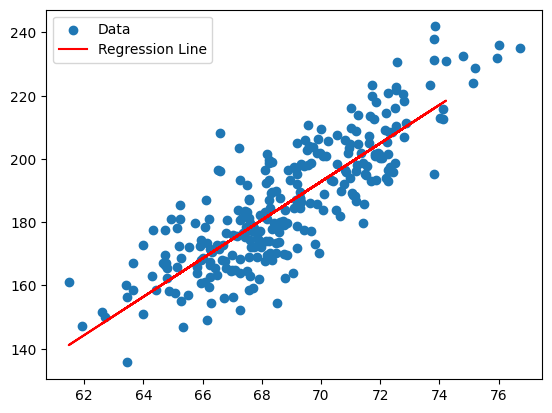

Mean Squared error = 117.39


In [10]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#----------------------------------------------------------------------------------------------#
df=pd.read_csv('hw.csv')
X,y=df.iloc[:,0].values.reshape(-1,1),df.iloc[:,1].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#----------------------------------------------------------------------------------------------#
model=LinearRegression().fit(X_train,y_train)
preds=model.predict(X_test)
mse=mean_squared_error(y_test,preds)
#----------------------------------------------------------------------------------------------#
plt.figure()
plt.scatter(X,y,label="Data")
plt.plot(X_test,preds,color='red',label="Regression Line")
plt.legend()
plt.show()
print(f"Mean Squared error = {mse:.2f}")

# 2. Image Enhancement

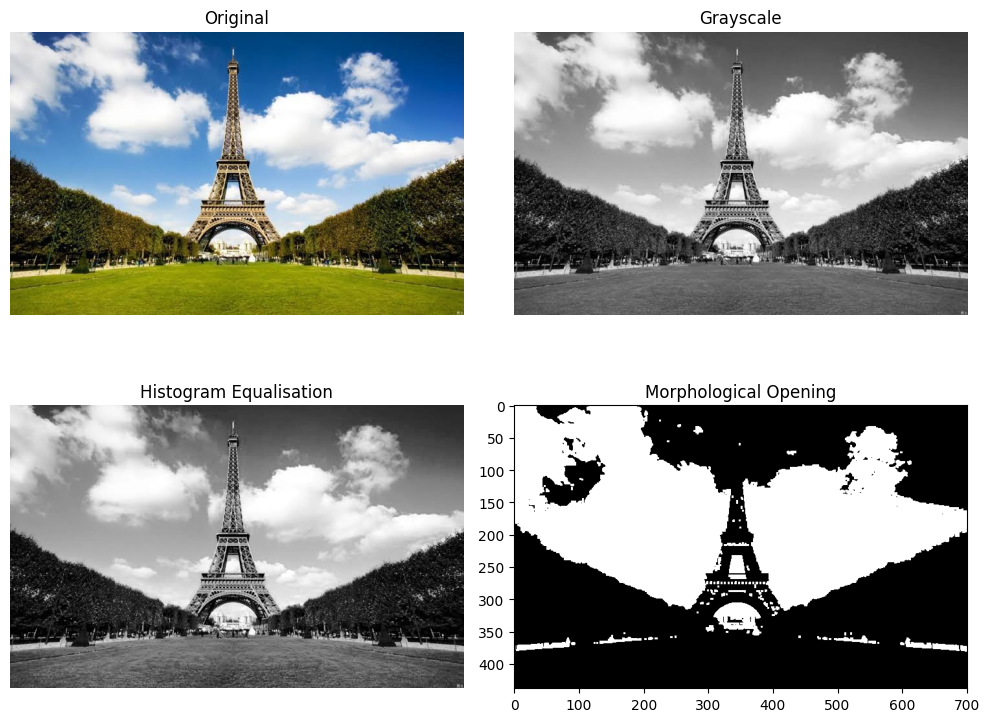

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#----------------------------------------------------------------------------------------------#
img=cv2.imread('eiffel-tower.jpeg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
hist=cv2.equalizeHist(gray)
binr=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
kernel=np.ones((3,3),np.uint8)
morp=cv2.morphologyEx(binr,cv2.MORPH_OPEN,kernel,iterations=1)
#----------------------------------------------------------------------------------------------#
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title("Original")
plt.imshow(img)
plt.axis('off')

plt.subplot(2,2,2)
plt.title("Grayscale")
plt.imshow(gray,cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title("Histogram Equalisation")
plt.imshow(hist,cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title("Morphological Opening")
plt.imshow(morp,cmap='gray')

plt.tight_layout()
plt.show()

# 3.CIFAR-10 Different Hyperparameters

313/313 [==============================] - 0s 505us/step - loss: 1.6546 - accuracy: 0.4089
Run:1

Hidden Layers:(1024, 512, 256)
Activation:tanh
Test Accuracy:22.67
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run:2

Hidden Layers:(1024, 512, 256)
Activation:sigmoid
Test Accuracy:34.45
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run:3

Hidden Layers:(1024, 512, 256)
Activation:relu
Test Accuracy:40.5
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run:4

Hidden Layers:(512, 256, 128)
Activation:tanh
Test Accuracy:30.9
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run:5

Hidden Layers:(512, 256, 128)
Activation:sigmoid
Test Accuracy:35.79
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run:6

Hidden Layers:(512, 256, 128)
Activation:relu
Test Accuracy:42.02
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run:7

Hidden Layers:(256, 128, 64)
Activation:tanh
Test Accuracy:32.33
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run:8

Hidden Layers:(256, 128, 64)
Activation:sigmoid
Test Accuracy:3

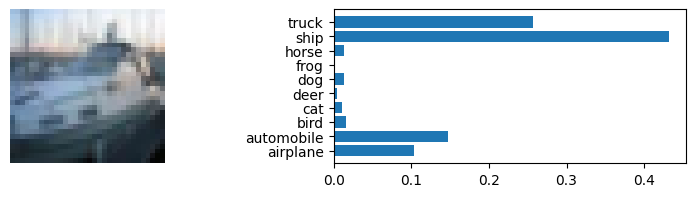

In [44]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
#----------------------------------------------------------------------------------------------#
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
X_train,X_test=X_train/255,X_test/255
y_train,y_test=to_categorical(y_train),to_categorical(y_test)
#----------------------------------------------------------------------------------------------#
def create_model(hidden=None,act=None):
    model=Sequential([
        Flatten(input_shape=(32,32,3)),
        Dense(hidden[0],activation=act),
        Dense(hidden[1],activation=act),
        Dense(hidden[2],activation=act),
        Dense(10,activation='softmax')
    ])
    return model
#----------------------------------------------------------------------------------------------#
hidden=[(1024,512,256),(512,256,128),(256,128,64)]
acts=['tanh','sigmoid','relu']
results={}
run=1
#----------------------------------------------------------------------------------------------#
for layers in hidden:
    for act in acts:
        model=create_model(layers,act)
        model.compile(metrics=['accuracy'],optimizer='adam',loss='categorical_crossentropy')
        model.fit(X_train,y_train,epochs=2,validation_split=0.2,batch_size=64,verbose=0)
        _,acc=model.evaluate(X_test,y_test)
        results[run]={"Hidden Layers" : layers,
                     "Activation":act,
                      "Test Accuracy":round(acc*100,2)
                     }
        run+=1
#----------------------------------------------------------------------------------------------#
for i,j in results.items():
    print(f"Run:{i}\n")
    for key,value in j.items():
        print(f"{key}:{value}")
    print("- -"*15)
#----------------------------------------------------------------------------------------------#
max_run=max(results,key=lambda k: results[k]["Test Accuracy"])
print(f"Run with the highest test accuracy \n\nRun:{max_run}")
for key,value in results[max_run].items():
    print(f"{key}:{value}")
print("- -"*15)
#----------------------------------------------------------------------------------------------#
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
sample=X_test[:8]
preds=model.predict(sample)
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.imshow(sample[2])
plt.axis('off')
plt.subplot(1,2,2)
plt.barh(labels,preds[2])
plt.show()

# 4.CNN MNIST

In [63]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
#----------------------------------------------------------------------------------------------#
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train,X_test=X_train/255,X_test/255
y_train,y_test=to_categorical(y_train),to_categorical(y_test)
#----------------------------------------------------------------------------------------------#
model=Sequential([
    Conv2D(32,3,activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(),
    Conv2D(64,3,activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(),
    Conv2D(64,3,activation='relu',input_shape=(28,28,1)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])
#----------------------------------------------------------------------------------------------#
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=64,validation_split=0.2,verbose=0)
loss,acc=model.evaluate(X_test,y_test)
print(f"Loss ={loss:.2f}\nAccuracy={acc*100:.2f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0306 - accuracy: 0.9921
Loss =0.03
Accuracy=99.21


# 5. IMDB RNN

In [12]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import LSTM,Embedding,Dense
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
#----------------------------------------------------------------------------------------------#
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=10000)
X_train,X_test=pad_sequences(X_train,maxlen=200),pad_sequences(X_test,maxlen=200)
#----------------------------------------------------------------------------------------------#
model=Sequential([
    Embedding(input_dim=10000,output_dim=128,input_length=200),
    LSTM(128),
    Dense(1,activation='sigmoid')
])
#----------------------------------------------------------------------------------------------#
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,batch_size=64,validation_split=0.2,verbose=0)
#----------------------------------------------------------------------------------------------#
loss,acc=model.evaluate(X_test,y_test)
print(f"Loss ={loss:.2f}\nAccuracy={acc*100:.2f}")
#----------------------------------------------------------------------------------------------#
pred=model.predict(X_test[0].reshape(-1,1))
"Positive" if pred[0]>=0.5 else "Negative"

782/782 [==============================] - 25s 32ms/step - loss: 0.3416 - accuracy: 0.8631
Loss =0.34
Accuracy=86.31
7/7 [==============================] - 0s 568us/step


'Positive'

# 6. NIFTY 50

61/61 [==============================] - 0s 230us/step


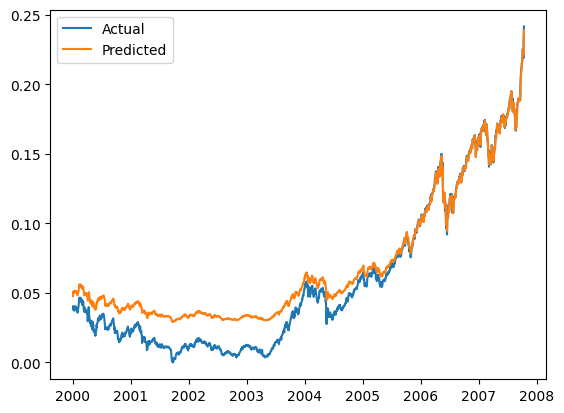

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
#----------------------------------------------------------------------------------------------#
df=pd.read_csv('Nifty.csv',parse_dates=True,index_col='Date',date_format='%d-%b-%y')
scaler=MinMaxScaler()
df.iloc[:,:]=scaler.fit_transform(df.iloc[:,:])
X,y=train_test_split(df,test_size=0.33,shuffle=False)
#----------------------------------------------------------------------------------------------#
model=Sequential([
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='linear')
])
model.compile(loss='mse',optimizer='adam')
model.fit(X.iloc[:,:3],X.iloc[:,3],epochs=70,verbose=0)
#----------------------------------------------------------------------------------------------#
preds=model.predict(y.iloc[:,:3])
plt.plot(y.index,y.iloc[:,3],label="Actual")
plt.plot(y.index,preds,label="Predicted")
plt.legend()
plt.show()